<body>
    <h1 id="hong" align="center";font-size:40px> Abnormal Heart rhythm detection using electrocardiogram (ECG) data </h1>
    <div style="text-align:center" class="caption">
      <img src='./ECG.jpg' border="2.5" alt='ECG' width="800" height="300" />
    </div>
</body>

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


In [9]:
#!type file1.csv file2.csv > concat.csv

data = data2 = ""
 
# Reading data from file1
with open('..\..\data\ECG5000_TRAIN.txt') as fp:
    data = fp.read()
 
# Reading data from file2
with open('..\..\data\ECG5000_test.txt') as fp:
    data2 = fp.read()
 
# Merging 2 files
# To add the data of file2
# from next line
data += "\n"
data += data2
 
with open ('..\..\data\ecg_final.txt', 'w') as fp:
    fp.write(data)

In [6]:
df = pd.read_csv('..\..\data\ecg_final.txt', sep = '  ', header=None)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_22712\3996317936.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('..\..\data\ecg_final.txt', sep = '  ', header=None)


In [7]:
df

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,1.0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,...,0.160348,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137
1,1.0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
2,1.0,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
3,1.0,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
4,1.0,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4.0,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,...,0.205543,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334
4996,2.0,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,...,1.218185,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932
4997,2.0,-1.351779,-2.209006,-2.520225,-3.061475,-3.065141,-3.030739,-2.622720,-2.044092,-1.295874,...,-0.896575,-1.512234,-2.076075,-2.586042,-3.322799,-3.627311,-3.437038,-2.260023,-1.577823,-0.684531
4998,2.0,-1.124432,-1.905039,-2.192707,-2.904320,-2.900722,-2.761252,-2.569705,-2.043893,-1.490538,...,-2.495989,-2.821782,-3.268355,-3.634981,-3.168765,-2.245878,-1.262260,-0.443307,-0.559769,0.108568


In [100]:
df.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            131, 132, 133, 134, 135, 136, 137, 138, 139, 140],
           dtype='int64', length=141)

In [101]:
df = df.add_prefix('c')

In [102]:
df.columns

Index(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9',
       ...
       'c131', 'c132', 'c133', 'c134', 'c135', 'c136', 'c137', 'c138', 'c139',
       'c140'],
      dtype='object', length=141)

In [103]:
df['c0'].value_counts()

1.0    2919
2.0    1767
4.0     194
3.0      96
5.0      24
Name: c0, dtype: int64

In [104]:
df.describe()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c131,c132,c133,c134,c135,c136,c137,c138,c139,c140
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.527400,-0.262476,-1.649511,-2.492211,-3.119443,-3.167438,-2.866308,-2.273126,-1.798127,-1.410124,...,0.146319,0.070973,-0.062914,-0.276206,-0.507667,-0.761043,-0.834741,-0.642263,-0.487242,-0.706008
std,0.760372,1.152369,1.445493,1.386409,1.302802,1.104382,0.906133,0.731627,0.623100,0.637149,...,1.171299,1.404842,1.646585,1.895134,2.059758,2.086218,2.056220,1.859296,1.830987,1.414465
min,1.000000,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,...,-3.971715,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227
25%,1.000000,-1.004511,-2.701576,-3.668096,-4.227247,-4.007470,-3.480479,-2.779941,-2.165851,-1.774124,...,-0.655753,-1.089300,-1.588885,-2.147449,-2.731550,-3.030509,-2.868331,-2.153513,-1.657771,-1.596692
50%,1.000000,-0.297541,-1.661892,-2.585677,-3.387934,-3.468718,-2.947061,-2.285578,-1.750157,-1.422570,...,0.473642,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.565588
75%,2.000000,0.500061,-0.677290,-1.513964,-2.235369,-2.530967,-2.398813,-1.823494,-1.484923,-1.063708,...,1.062134,1.169420,1.238687,1.264471,1.234433,1.034584,0.945237,0.951681,1.002692,0.272012
max,5.000000,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,...,2.960969,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103


In [105]:
# c0 is label 
train_data, test_data, train_labels, test_labels = train_test_split(df.values, df.values[:, 0:1], test_size=0.2, random_state=111)

In [106]:
scaler = MinMaxScaler()
data_scaled = scaler.fit(train_data)

In [107]:
train_data_scaled = data_scaled.transform(train_data)
# using learned data to scale test data too
test_data_scaled  = data_scaled.transform(test_data)

In [108]:
train_data_scaled

array([[0.        , 0.50002524, 0.42299659, ..., 0.61680162, 0.58388556,
        0.3649298 ],
       [0.        , 0.48602565, 0.31200637, ..., 0.60438613, 0.6676527 ,
        0.40538671],
       [0.        , 0.6760041 , 0.6161329 , ..., 0.73484988, 0.64562905,
        0.43438114],
       ...,
       [0.25      , 0.70698484, 0.7982501 , ..., 0.23053824, 0.31421167,
        0.37774737],
       [0.        , 0.46498254, 0.25827775, ..., 0.6340938 , 0.66453824,
        0.47717869],
       [0.25      , 0.69314707, 0.79831145, ..., 0.68561341, 0.61110713,
        0.53512758]])

In [109]:
normal_train_data  = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
anomaly_train_data = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 > 0').values [:,1:]

normal_test_data   = pd.DataFrame(test_data_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
anomaly_test_data  = pd.DataFrame(test_data_scaled).add_prefix('c').query('c0 > 0').values[:,1:]

In [110]:
print(f'normal train data shape: {normal_train_data.shape}')
print(f'normal test data shape: {normal_test_data.shape}')

print(f'anormaly train data shape: {anomaly_train_data.shape}')
print(f'anormaly test data shape: {anomaly_test_data.shape}')

normal train data shape: (2356, 140)
normal test data shape: (563, 140)
anormaly train data shape: (1644, 140)
anormaly test data shape: (437, 140)


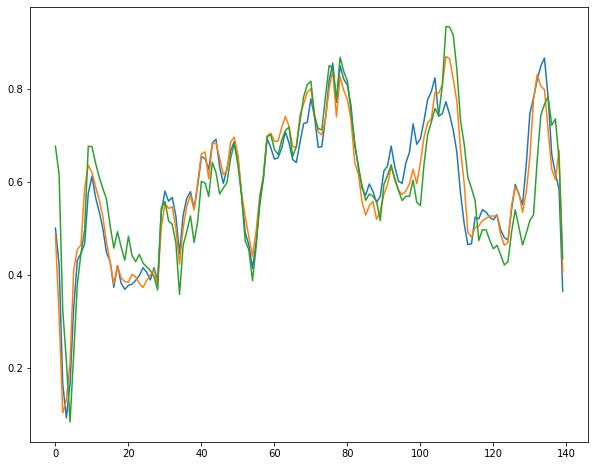

In [111]:
# ploting 3 first records of normal data
plt.plot(normal_train_data[0])
plt.plot(normal_train_data[1])
plt.plot(normal_train_data [2] )

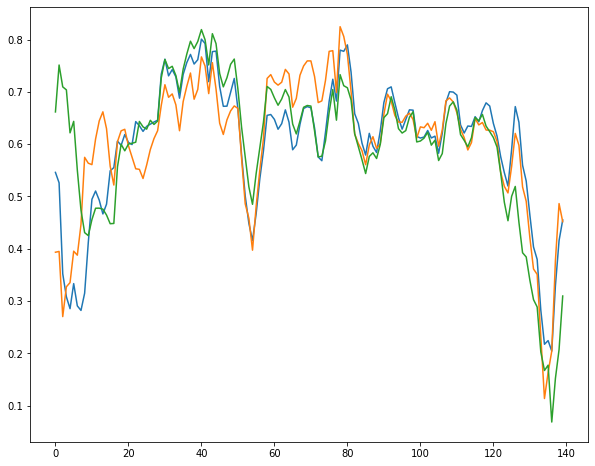

In [112]:
# ploting 3 first records of anomal data
plt.plot(anomaly_train_data[0])
plt.plot(anomaly_train_data[1])
plt.plot(anomaly_train_data [2] )

### How to model?
1- Sequential model with 2 layers i) encoder which does down sampling (64->32->16->8) embeds data in 8-unit vectors ii) decoder does up sampling to reconstruct.
encoder then decoder is lossy construction, and reconstruction error for anomaly data is higher than normal data.
2- Model subclassing; this option gives us a way to separate encoder and decoder layers, thus it allows to use encoder to compress data and use different algorithm likes xgboost

In [113]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8,  activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(140,activation='sigmoid'))

In [114]:
class AutoEncoder(Model) :
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation="relu"),
            tf.keras.layers.Dense(32, activation="relu"),
            tf.keras.layers.Dense(16, activation="relu"),
            tf.keras.layers.Dense(8,  activation="relu")])
        
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(16, activation="relu"),
            tf.keras.layers.Dense(32, activation="relu"),
            tf.keras.layers.Dense(64, activation="relu"),
            tf.keras.layers.Dense(140, activation="sigmoid") ])
        
    def call(self, x):
        encoded= self.encoder(x)
        decoded = self.decoder(encoded) # decoding the encoded data
        return decoded

In [115]:
"""
We want to early stop in case the validation loss doesn't improve (drop) for more than 2 epochs.
Note:  for validation loss we always set mode to ‘min’ and for accuracy we need to set to ‘max’ or ‘auto’ it understands automatically.
"""
model = AutoEncoder()
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=2,
                                                  mode='min')
model.compile(optimizer='adam', loss='mae')

In [116]:
#fitting the model with the data
"""
We pass normal_train_data as x and the same normal_train_data as y parameters because they are mandatory parameters. The Y is kind of dummy variable because 
we are working as unsupervised manner, so we don't have labels.
"""
history = model.fit(normal_train_data, normal_train_data, # model fits to normal data and lerans it
                    epochs = 100,
                    batch_size = 120,
                    validation_data = (train_data_scaled[:,1:], train_data_scaled[:,1:]), # We use all train data as validation which is contains both normal and anomaly data, and reason is when data is normal it going to have very low absolute error so it helps to separate classes perfectly
                    shuffle = True, # in the case of timeserise data avoid passing True
                    callbacks = [early_stopping])


Epoch 1/100
20/20 [==============================] - 2s 22ms/step - loss: 0.1267 - val_loss: 0.1098
Epoch 2/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0754 - val_loss: 0.0810
Epoch 3/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0521 - val_loss: 0.0764
Epoch 4/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0480 - val_loss: 0.0746
Epoch 5/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0474 - val_loss: 0.0739
Epoch 6/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0471 - val_loss: 0.0734
Epoch 7/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0468 - val_loss: 0.0728
Epoch 8/100
20/20 [==============================] - 0s 10ms/step - loss: 0.0462 - val_loss: 0.0716
Epoch 9/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0438 - val_loss: 0.0672
Epoch 10/100
20/20 [==============================] - 0s 8ms/step - loss: 0.0397 - val_loss: 0.0630
Epoch 1

In [117]:
# We pass data which is 140 variables and encoder represents it with 8 unit
encoder_out = model.encoder(normal_test_data).numpy()
# The decoder takes 8 unit representation and reconstructs 140 units from it
decoder_out = model.decoder(encoder_out).numpy()

In [118]:
print('Encoded data shape is {}'.format(encoder_out.shape))
print('Decoded data shape is {}'.format(decoder_out.shape))

Encoded data shape is (563, 8)
Decoded data shape is (563, 140)


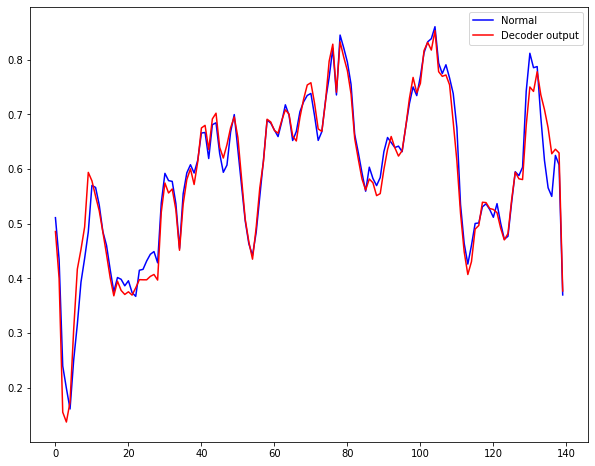

In [119]:
plt.plot(normal_test_data[0],'b',label='Normal')
plt.plot(decoder_out[0],'r',label='Decoder output')
plt.legend()

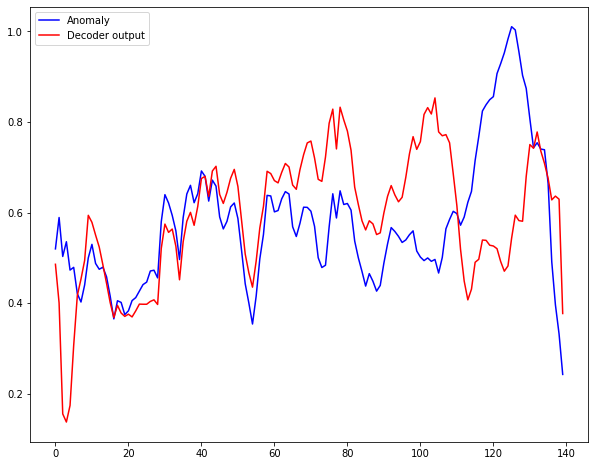

In [120]:
plt.plot(anomaly_test_data[0],'b',label='Anomaly')
plt.plot(decoder_out[0],'r',label='Decoder output')
plt.legend()

18/18 [==============================] - 0s 1ms/step


(array([ 5., 14., 23., 31., 37., 36., 44., 49., 36., 38., 42., 31., 17.,
        19., 19., 10., 21., 13.,  8.,  6.,  5.,  5.,  1.,  5.,  8.,  4.,
         3.,  4.,  5.,  2.,  2.,  3.,  3.,  2.,  2.,  2.,  1.,  0.,  0.,
         0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  2.]),
 array([0.0125 , 0.01411, 0.01572, 0.01733, 0.01894, 0.02055, 0.02216,
        0.02377, 0.02538, 0.02699, 0.0286 , 0.03021, 0.03182, 0.03343,
        0.03504, 0.03665, 0.03826, 0.03987, 0.04148, 0.04309, 0.0447 ,
        0.04631, 0.04792, 0.04953, 0.05114, 0.05275, 0.05436, 0.05597,
        0.05758, 0.05919, 0.0608 , 0.06241, 0.06402, 0.06563, 0.06724,
        0.06885, 0.07046, 0.07207, 0.07368, 0.07529, 0.0769 , 0.07851,
        0.08012, 0.08173, 0.08334, 0.08495, 0.08656, 0.08817, 0.08978,
        0.09139, 0.093  ]),
 <BarContainer object of 50 artists>)

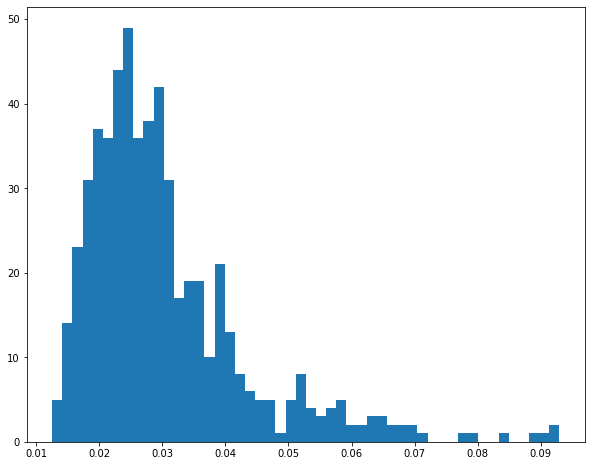

In [121]:
reconstructions = model.predict(normal_test_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_test_data)

train_loss = train_loss.numpy()
train_loss = [round(x,4) for x in train_loss]
plt.hist(train_loss, bins = 50)

In [122]:
# mean of train loss
print('mean of train loss: {}'.format(np.mean(train_loss)))
# std of train loss
print('std of train loss: {}'.format(np.std(train_loss)))

# Based on the different logic 2 std above the mean can be good threshold
threshold = np.mean(train_loss) + 2 * np.std(train_loss)      
# threshold of train loss
print('threshold to flag anomalies: {}'.format(threshold))


mean of train loss: 0.030434103019538188
std of train loss: 0.012991265355136707
threshold to flag anomalies: 0.0564166337298116


14/14 [==============================] - 0s 2ms/step


(array([ 1.,  0.,  0.,  1.,  0.,  1.,  2.,  3.,  1.,  4.,  7., 17., 22.,
        41., 43., 50., 52., 52., 38., 31., 27., 22.,  6.,  1.,  1.,  1.,
         0.,  1.,  2.,  3.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.042   , 0.045204, 0.048408, 0.051612, 0.054816, 0.05802 ,
        0.061224, 0.064428, 0.067632, 0.070836, 0.07404 , 0.077244,
        0.080448, 0.083652, 0.086856, 0.09006 , 0.093264, 0.096468,
        0.099672, 0.102876, 0.10608 , 0.109284, 0.112488, 0.115692,
        0.118896, 0.1221  , 0.125304, 0.128508, 0.131712, 0.134916,
        0.13812 , 0.141324, 0.144528, 0.147732, 0.150936, 0.15414 ,
        0.157344, 0.160548, 0.163752, 0.166956, 0.17016 , 0.173364,
        0.176568, 0.179772, 0.182976, 0.18618 , 0.189384, 0.192588,
        0.195792, 0.198996, 0.2022  ]),
 <BarContainer object of 50 artists>)

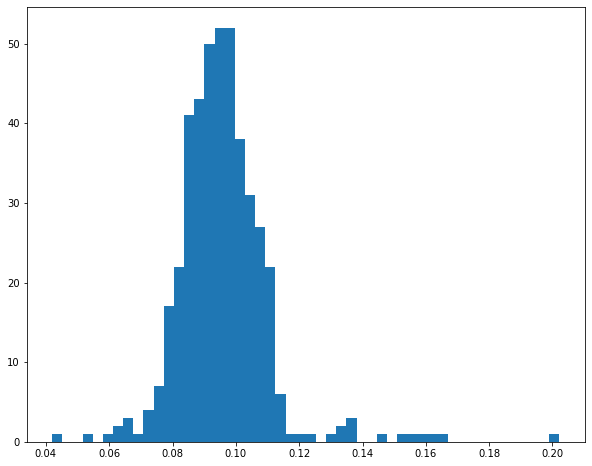

In [123]:
reconstructions_anomaly = model.predict(anomaly_test_data)
train_loss_anomaly = tf.keras.losses.mae(reconstructions_anomaly, anomaly_test_data)

train_loss_anomaly = train_loss_anomaly.numpy()
train_loss_anomaly = [round(x,4) for x in train_loss_anomaly]
plt.hist(train_loss_anomaly, bins = 50)

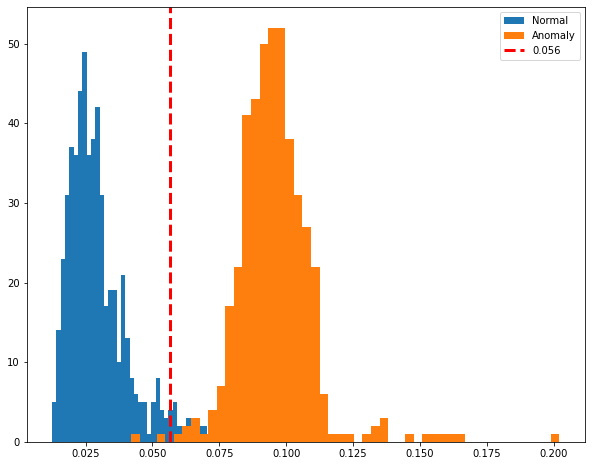

In [124]:
plt.hist(train_loss, bins = 50, label='Normal')
plt.hist(train_loss_anomaly, bins = 50, label='Anomaly')
plt.axvline(threshold, color='r', linewidth=3, linestyle='dashed', label='{:0.3f}'.format(threshold))
plt.legend(loc='upper right')
plt.show()

In [125]:
# mean of train loss
print('mean of train loss: {}'.format(np.mean(train_loss_anomaly)))
# std of train loss
print('std of train loss: {}'.format(np.std(train_loss_anomaly)))

# Based on the different logic 2 std above the mean can be good threshold
threshold_anomaly = np.mean(train_loss) + 2 * np.std(train_loss_anomaly)      
# threshold of train loss
print('threshold to flag anomalies: {}'.format(threshold_anomaly))

mean of train loss: 0.09581304347826088
std of train loss: 0.014545599069591606
threshold to flag anomalies: 0.0595253011587214


In [126]:
preds = tf.math.less(train_loss, threshold)
# This count shows how many data predicted correctly
tf.math.count_nonzero(preds)

<tf.Tensor: shape=(), dtype=int64, numpy=531>

In [127]:
preds.shape

TensorShape([563])

In [128]:
preds_anomaly = tf.math.greater(train_loss_anomaly, threshold)
# This count shows how many data predicted correctly

tf.math.count_nonzero(preds_anomaly)

<tf.Tensor: shape=(), dtype=int64, numpy=435>

In [129]:
preds_anomaly.shape

TensorShape([437])